# Laboratorio di simulazioni numeriche
### Esercizio 11.2

L'esercizio richiede di estendere la rete utilizzata nel'esercizio precedente per ottenere un fit della funzione 

$$
f(x)=4-3x-2x^2+3x^3
$$

con  $x \in [-1,1]$. Per fare ciò si varino il numero di layer, di neuroni in ogni layer, le funzioni di attivazione, l'ottimizzatore e la funzione di costo.

### Commento risultati

Si riporta di seguito la configurazione utilizzata nel codice. Tale configurazione risulta in grado di costruire un modello che si discosta poco dalla curva nell'intervallo dato:
- architettura della rete: 1-60-40-20-1;
- funzioni di attivazione: sempre di tipo relu, a parte nell'output (lineare);
- ottimizzatore: sgd;
- loss: mse.

Rispetto a tale configurazione si osserva che:
- fissati i layer di sopra, l'eventuale aggiunta di altri layer non produce variazioni significative (Fig. 1);
- utilizzando 3 layer interni, un numero maggiore di neuroni non produce variazioni significative (Fig. 2), mentre usando un numero significativamente inferiore si ottengono risultati altrettanto convincenti ma con un andamento più spigoloso (Fig. 3);
- tra le altre funzioni provate elu ha prodotto risultati non troppo discordanti (Fig. 4);
- un ottimizzato altrettando conveniente è adam (produce risultati troppo diversi da SGD, eccezion fatta per gli estremi dell'intervallo, Fig. 5);
- adagrad è un ottimizzatore particolarmente sconveniente in questo contesto;
- msle è una loss particolarmente sconveniente (Fig. 6).

Ulteriori osservazioni: 
- fuori dall'intervallo di training non riesco mai a fare predizioni sensate;
- usare configurazioni con un numero decrescente, crescente o sempre uguale di neuroni nei vari layer non porta a significative differenze;
- aumentare il numero di parametri tramite l'aumento di layer e neuroni aumenta la bontà del fit; tuttavia raggiunta una certa soglia (intorno ai 1000) il comportamento satura.

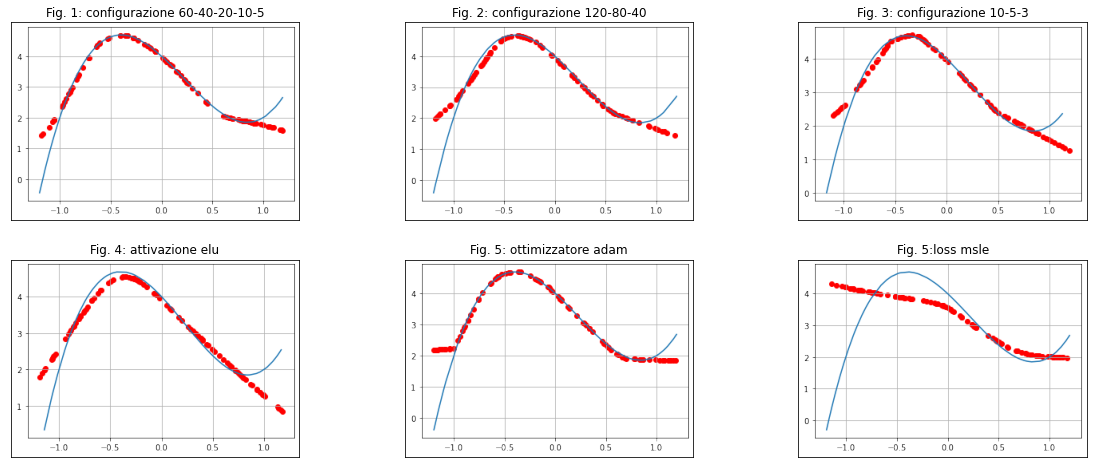

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f1 = plt.imread('Images/60_40_20_10_5.png')
f2 = plt.imread('Images/120_80_40.png')
f3 = plt.imread('Images/10_5_3.png')
f4 = plt.imread('Images/elu.png')
f5 = plt.imread('Images/adam.png')
f6 = plt.imread('Images/msle.png')

plt.figure(figsize=(20,8))
plt.subplot(2, 3, 1)
plt.imshow(f1)
plt.title('Fig. 1: configurazione 60-40-20-10-5')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(2, 3, 2)
plt.imshow(f2)
plt.title('Fig. 2: configurazione 120-80-40')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(2, 3, 3)
plt.imshow(f3)
plt.title('Fig. 3: configurazione 10-5-3')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(2, 3, 4)
plt.imshow(f4)
plt.title('Fig. 4: attivazione elu')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(2, 3, 5)
plt.imshow(f5)
plt.title('Fig. 5: ottimizzatore adam')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.subplot(2, 3, 6)
plt.imshow(f6)
plt.title('Fig. 5:loss msle')
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.show()

### Codice usato (condizioni ottimali)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [15]:
a = 4 #termine di ordine 0
b = -3 #1
c = -2 #2
d = 3 #3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 400)
x_valid = np.random.uniform(-1, 1, 40)
x_valid.sort()
y_target = a + b*x_valid + c*x_valid**2 + d*x_valid**3
sigma = 0.05
y_train = np.random.normal(a + b*x_train + c*x_train**2 + d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 + d*x_valid**3, sigma)

In [16]:
# creo la rete neurale, compilo e faccio il fit
model = tf.keras.Sequential()
model.add(Dense(60, input_shape=(1,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, batch_size=25, epochs=50, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________
Train on 400 samples, validate on 40 samples
Epoch 1/50
400/400 [==============================] - 0s 795us/sample - loss: 5.8331 - mse: 5.8331 - val_loss: 1.3972 - val_mse: 1.3972
Epoch 2/50
400/400 [==============================] - 0s 107us/sample

In [17]:
# valuto il modello
score = model.evaluate(x_valid, y_valid, batch_size=25, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# valuto rispetto al caso con sigma=0
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss with the exact curve:', score[0])
print('Test accuracy with the exact curve:', score[1])

40/40 [==============================] - 0s 122us/sample - loss: 0.0194 - mse: 0.0194

Test loss: 0.019417026778683066
Test accuracy: 0.019417027
40/40 [==============================] - 0s 100us/sample - loss: 0.0174 - mse: 0.0174

Test loss with the exact curve: 0.017438189312815666
Test accuracy with the exact curve: 0.01743819


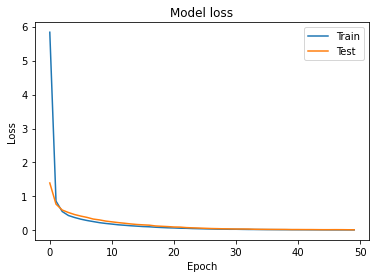

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

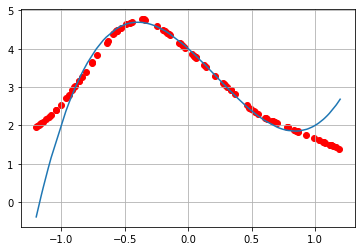

In [19]:
x_predicted = np.random.uniform(-1.2, 1.2, 100)
y_predicted = model.predict(x_predicted)
x_valid2 = np.random.uniform(-1.2, 1.2, 100)
x_valid2.sort()
y_target2 = a + b*x_valid2 + c*x_valid2**2 + d*x_valid2**3
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.show()